# Exploratory Data Analysis of Most Streamed Spotify Songs dataset
 by Ayushmaan and Harsh vats

Read the dataset

In [43]:
import pandas as pd

# Try reading the file with a different encoding, such as 'latin1'
data = pd.read_csv('Most Streamed Spotify Songs 2024.csv', encoding='latin1')
# Display the first few rows of the dataset
data.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,Genres
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"39,04,70,936","30,716","19,66,31,588",92.0,"8,42,74,754","17,13,126",Rock
1,Not Like Us,Not Like Us,Kendrick Lamar,05-04-2024,USUG12400910,2,545.9,"32,37,03,884","28,113","17,45,97,137",92.0,"11,63,47,040","34,86,739",pop
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"60,13,09,283","54,331","21,16,07,669",92.0,"12,25,99,116","22,28,730",jazz
3,Flowers,Flowers - Single,Miley Cyrus,01-12-2023,USSM12209777,4,444.9,"2,03,12,80,633","2,69,802","13,65,69,078",85.0,"1,09,61,00,899","1,06,29,796",hip hop
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"10,70,34,922","7,223","15,14,69,874",88.0,"7,73,73,957","36,70,188",Rythem


Handle null values

In [44]:
# Check for missing values
print(data.isna().sum())

Track                       0
Album Name                  0
Artist                      5
Release Date                0
ISRC                        0
All Time Rank               0
Track Score                 0
Spotify Streams           113
Spotify Playlist Count     70
Spotify Playlist Reach     72
Spotify Popularity        803
YouTube Views             308
YouTube Likes             315
Genres                      0
dtype: int64


Inspect the Data

In [45]:
# Inspect the structure and summary of the dataset
data.info()

# Summary statistics
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4598 entries, 0 to 4597
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Track                   4598 non-null   object 
 1   Album Name              4598 non-null   object 
 2   Artist                  4593 non-null   object 
 3   Release Date            4598 non-null   object 
 4   ISRC                    4598 non-null   object 
 5   All Time Rank           4598 non-null   object 
 6   Track Score             4598 non-null   float64
 7   Spotify Streams         4485 non-null   object 
 8   Spotify Playlist Count  4528 non-null   object 
 9   Spotify Playlist Reach  4526 non-null   object 
 10  Spotify Popularity      3795 non-null   float64
 11  YouTube Views           4290 non-null   object 
 12  YouTube Likes           4283 non-null   object 
 13  Genres                  4598 non-null   object 
dtypes: float64(2), object(12)
memory usage: 

,Track Score,Spotify Popularity
count,4598.000000,3795.000000
mean,41.845128,63.498287
std,38.552107,16.187299
min,19.400000,1.000000
25%,23.300000,61.000000
50%,29.900000,67.000000
75%,44.475000,73.000000
max,725.400000,96.000000


Drop rows where 'Artist' is null

In [46]:
# Display the number of rows before dropping
print(f"Number of rows before dropping null artists: {data.shape[0]}")

# Drop rows where 'Artist' is null
data = data.dropna(subset=['Artist'])

# Display the number of rows after dropping
print(f"Number of rows after dropping null artists: {data.shape[0]}")


Number of rows before dropping null artists: 4598
Number of rows after dropping null artists: 4593


Distribution of Songs Across Different Artists (Top 10)

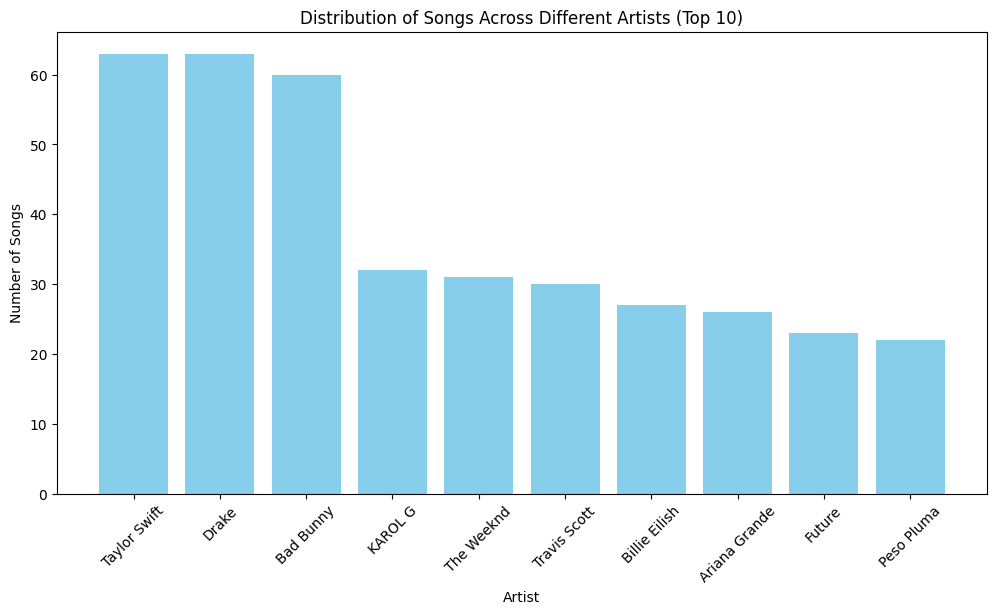

In [47]:
import matplotlib.pyplot as plt

# Get the count of songs by each artist
artist_counts = data['Artist'].value_counts().head(10)  # Display top 10 artists

# Plot the distribution of songs across different artists
plt.figure(figsize=(12, 6))
plt.bar(artist_counts.index, artist_counts.values, color='skyblue')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.title('Distribution of Songs Across Different Artists (Top 10)')
plt.xticks(rotation=45)
plt.show()





Average Track Score for Each Artist (top 10)

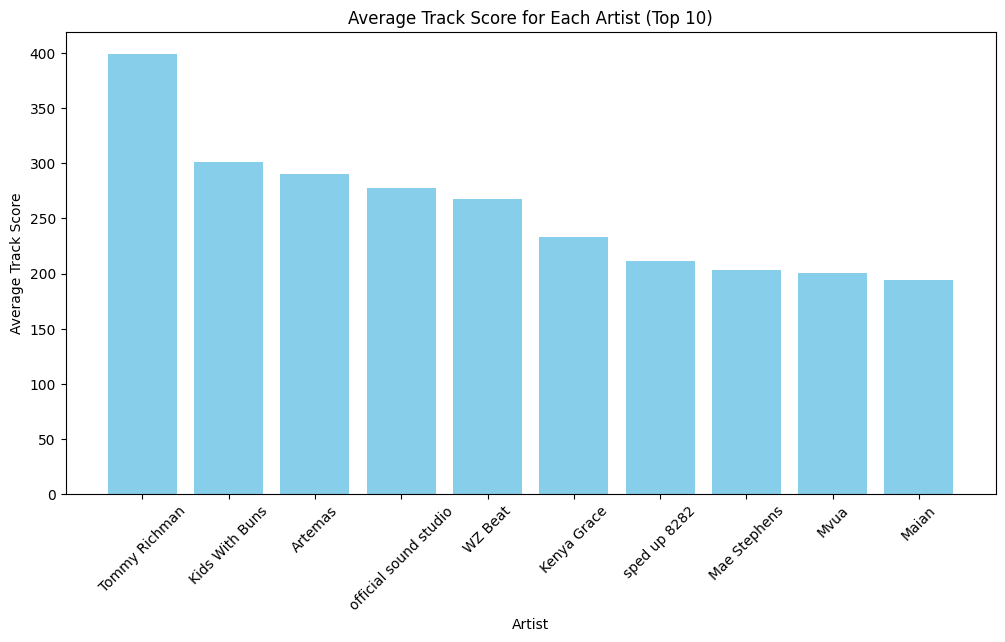

In [48]:
# Calculate the average track score for each artist
average_track_score = data.groupby('Artist')['Track Score'].mean().sort_values(ascending=False).head(10)

# Plot the average track score for each artist
plt.figure(figsize=(12, 6))
plt.bar(average_track_score.index, average_track_score.values, color='skyblue')
plt.xlabel('Artist')
plt.ylabel('Average Track Score')
plt.title('Average Track Score for Each Artist (Top 10)')
plt.xticks(rotation=45)
plt.show()


Distribution of Release Dates Over Time

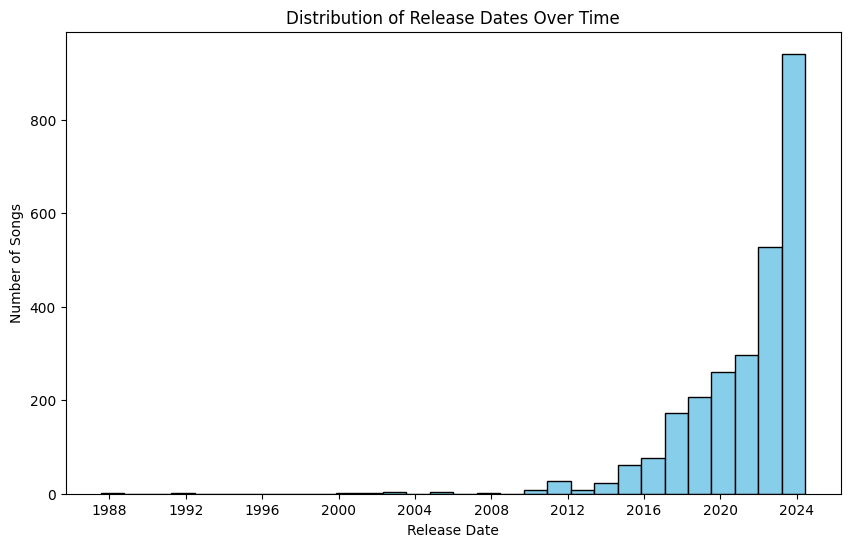

In [49]:
# Convert Release Date to datetime
data['Release Date'] = pd.to_datetime(data['Release Date'], errors='coerce')

# Plot the distribution of release dates
plt.figure(figsize=(10, 6))
plt.hist(data['Release Date'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Release Date')
plt.ylabel('Number of Songs')
plt.title('Distribution of Release Dates Over Time')
plt.show()


Distribution of Track Scores

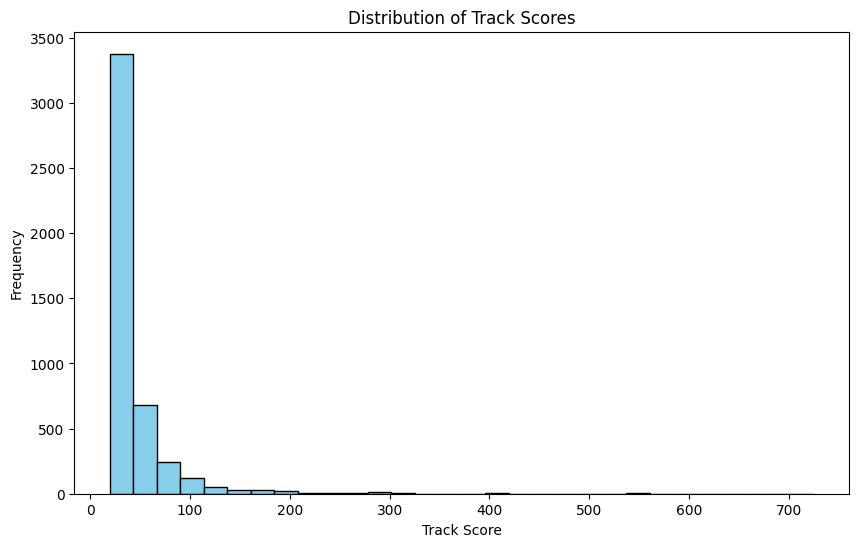

In [50]:

# Plot the distribution of track scores
plt.figure(figsize=(10, 6))
plt.hist(data['Track Score'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Track Score')
plt.ylabel('Frequency')
plt.title('Distribution of Track Scores')
plt.show()

Top 10 Songs by YouTube Likes

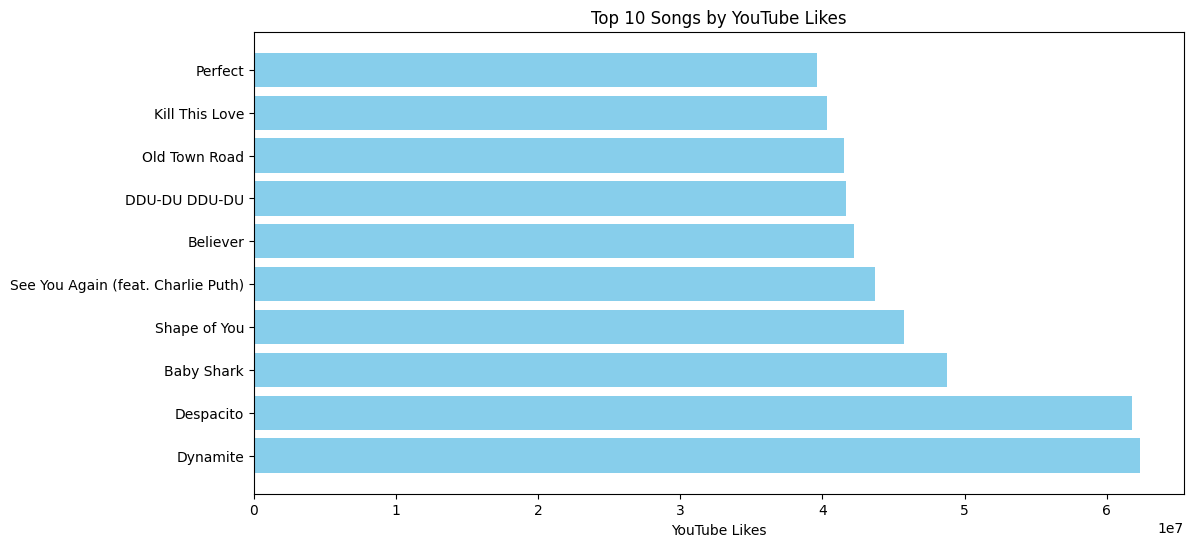

In [51]:
# Convert 'YouTube Likes' to numeric after removing commas
data['YouTube Likes'] = data['YouTube Likes'].str.replace(',', '').astype(float)

# Get the top 10 songs by YouTube likes
top_10_youtube_likes = data.nlargest(10, 'YouTube Likes')

# Plot the top 10 songs by YouTube likes
plt.figure(figsize=(12, 6))
plt.barh(top_10_youtube_likes['Track'], top_10_youtube_likes['YouTube Likes'], color='skyblue')
plt.xlabel('YouTube Likes')
plt.title('Top 10 Songs by YouTube Likes')
plt.show()

Albums with the Highest Average Track Scores

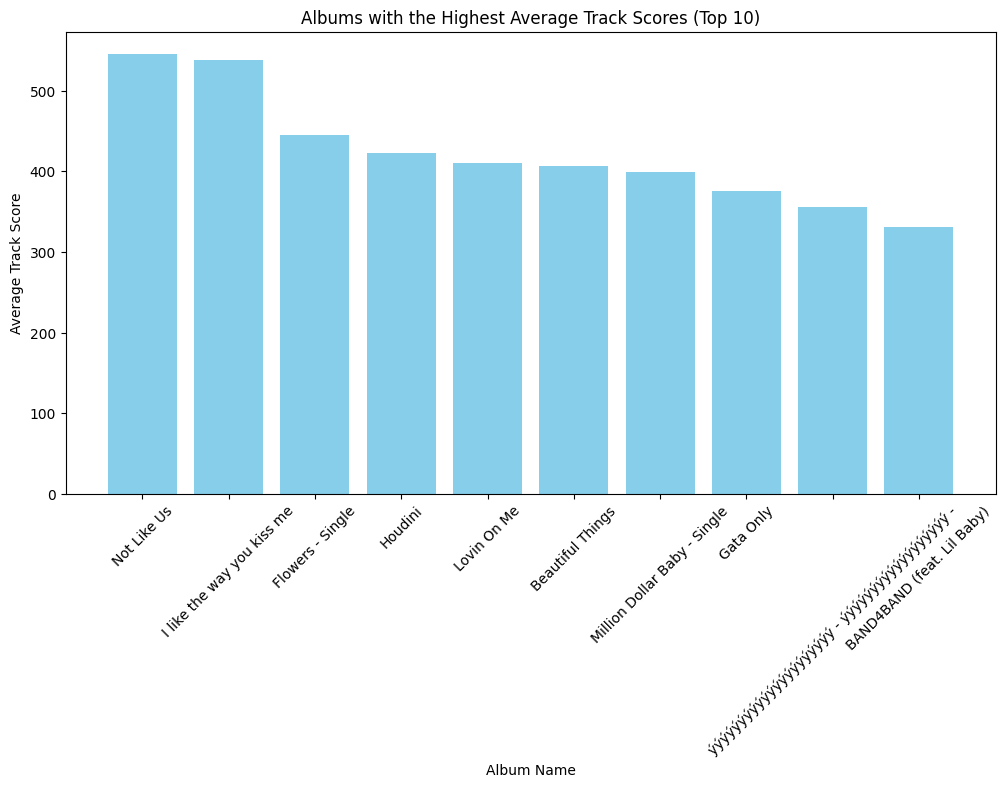

In [52]:
# Calculate the average track score for each album
average_album_score = data.groupby('Album Name')['Track Score'].mean().sort_values(ascending=False).head(10)

# Plot the average track score for each album
plt.figure(figsize=(12, 6))
plt.bar(average_album_score.index, average_album_score.values, color='skyblue')
plt.xlabel('Album Name')
plt.ylabel('Average Track Score')
plt.title('Albums with the Highest Average Track Scores (Top 10)')
plt.xticks(rotation=45)
plt.show()


 Number of Songs Released Each Year

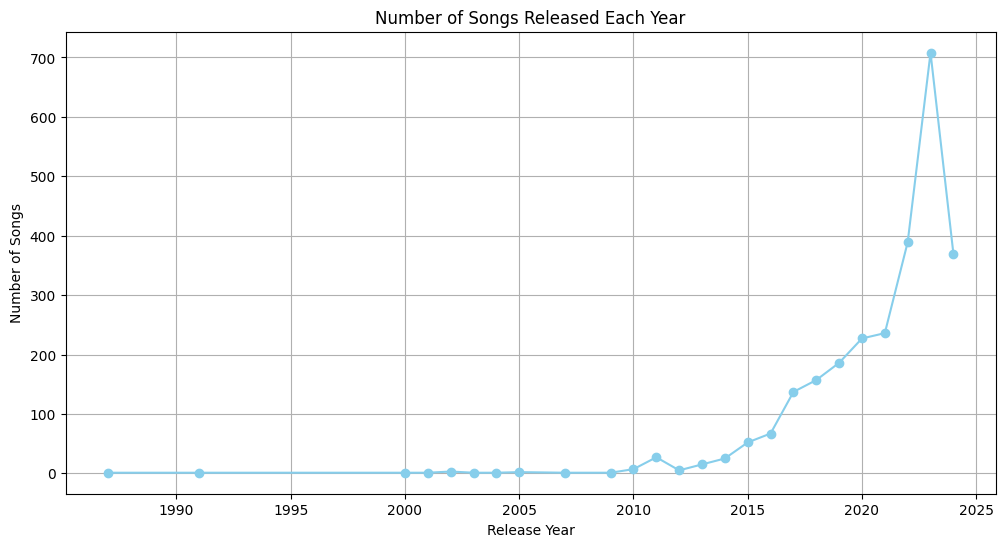

In [53]:
# Extract the year from the release date
data['Release Year'] = data['Release Date'].dt.year

# Count the number of songs released each year
release_year_counts = data['Release Year'].value_counts().sort_index()

# Plot the number of songs released each year
plt.figure(figsize=(12, 6))
plt.plot(release_year_counts.index, release_year_counts.values, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Release Year')
plt.ylabel('Number of Songs')
plt.title('Number of Songs Released Each Year')
plt.grid(True)
plt.show()


Depict Count of Songs Released Each Month on a Line Chart Superimposed on a Bar Chart

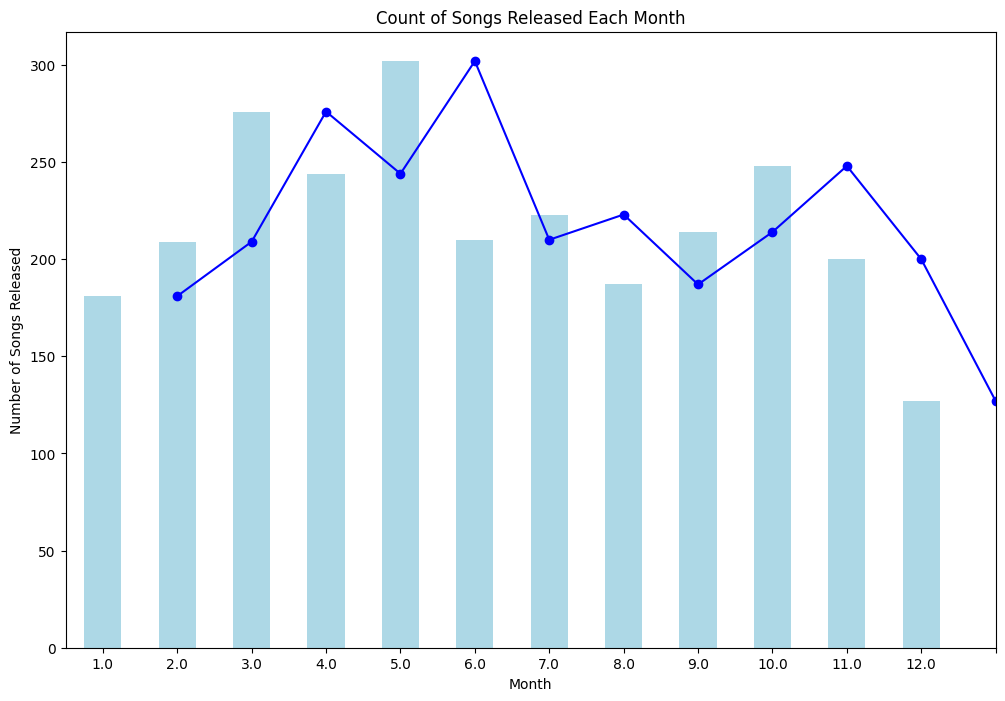

In [54]:
# Extract month and year from 'Release Date'
data['Release Date'] = pd.to_datetime(data['Release Date'])
data['Release_Month'] = data['Release Date'].dt.month
data['Release_Year'] = data['Release Date'].dt.year

# Group by release month
monthly_counts = data['Release_Month'].value_counts().sort_index()

# Line chart superimposed on a bar chart
plt.figure(figsize=(12, 8))
monthly_counts.plot(kind='bar', color='lightblue')
monthly_counts.plot(kind='line', marker='o', color='blue')
plt.xlabel('Month')
plt.ylabel('Number of Songs Released')
plt.title('Count of Songs Released Each Month')
plt.xticks(range(0, 13))
plt.show()




Distribution of Track Scores for Songs with Over 100 Million Spotify Steams

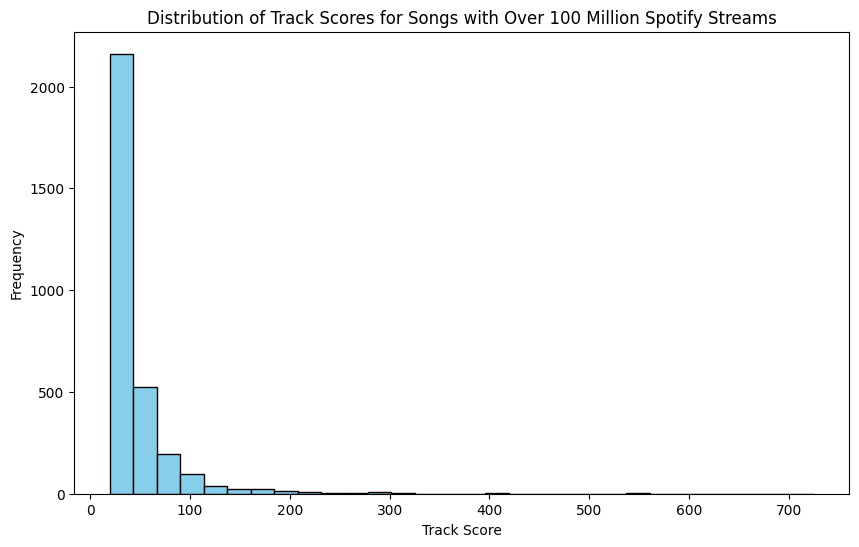

In [55]:
# Convert 'Spotify Streams' to numeric after removing commas
data['Spotify Streams'] = data['Spotify Streams'].str.replace(',', '').astype(float)

# Filter the dataset for songs with over 100 million Spotify streams
high_streams = data[data['Spotify Streams'] > 100_000_000]

# Plot the distribution of track scores for these songs
plt.figure(figsize=(10, 6))
plt.hist(high_streams['Track Score'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Track Score')
plt.ylabel('Frequency')
plt.title('Distribution of Track Scores for Songs with Over 100 Million Spotify Streams')
plt.show()

Compare Streams vs. Release Month on a Scatter Plot for the Top 5 Artists

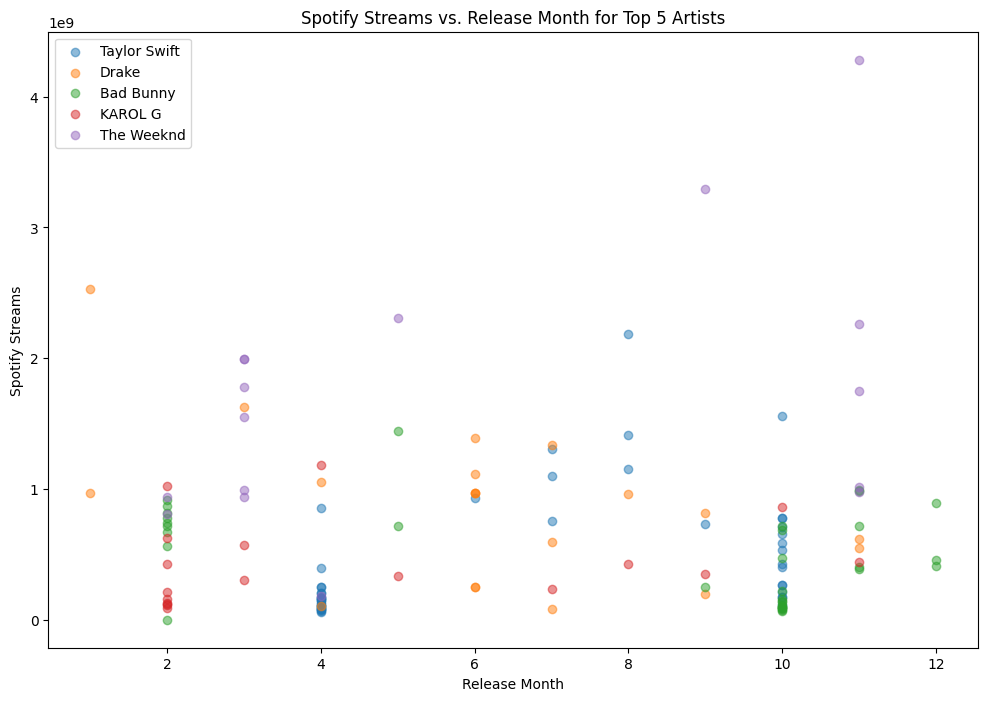

In [56]:
# Get top 5 artists
top_artists = data['Artist'].value_counts().head(5).index
# Filter data for top 5 artists
top_artists_data = data[data['Artist'].isin(top_artists)]
# Scatter plot
plt.figure(figsize=(12, 8))
for artist in top_artists:
    subset = top_artists_data[top_artists_data['Artist'] == artist]
    plt.scatter(subset['Release_Month'], subset['Spotify Streams'], alpha=0.5, label=artist)
    
plt.xlabel('Release Month')
plt.ylabel('Spotify Streams')
plt.title('Spotify Streams vs. Release Month for Top 5 Artists')
plt.legend()
plt.show()


Find Maximum Streams by 'Release_Month' where 'Genre' is 'modern folk rock'. Depict the Result on a Bar Chart

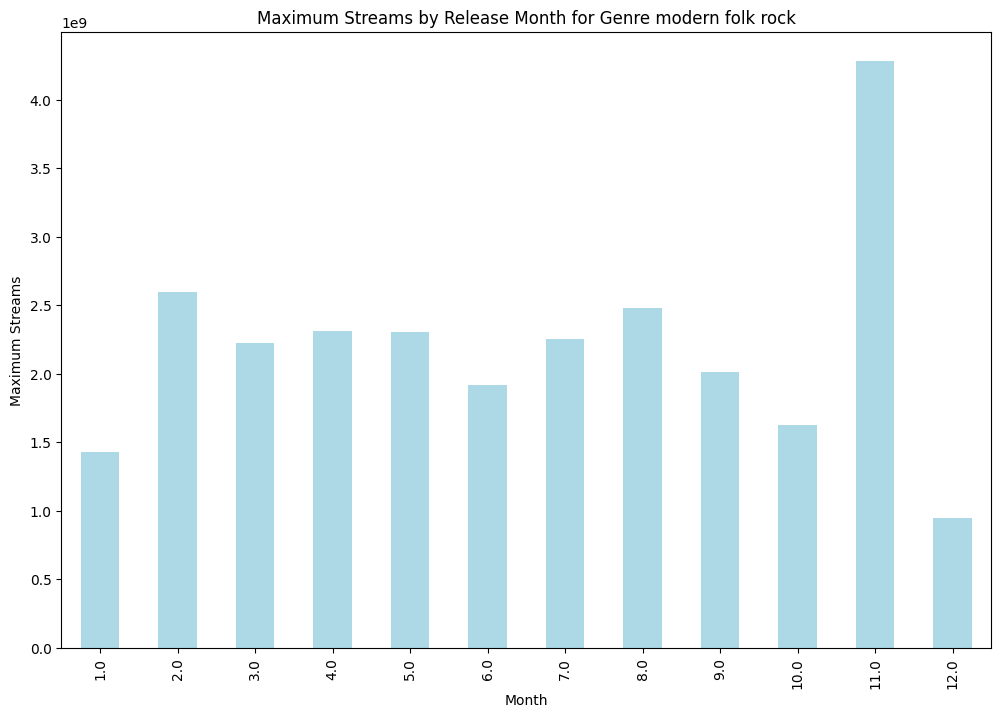

In [57]:
# Filter data for genre 'Pop'
pop_data = data[data['Genres'] == 'pop']

# Group by release month and find max streams
pop_max_streams = pop_data.groupby('Release_Month')['Spotify Streams'].max()

# Bar chart
plt.figure(figsize=(12, 8))
pop_max_streams.plot(kind='bar', color='lightblue')
plt.xlabel('Month')
plt.ylabel('Maximum Streams')
plt.title('Maximum Streams by Release Month for Genre modern folk rock')
plt.show()

Compare Frequency Distribution of Streams for the Top 3 Genres on a Histogram

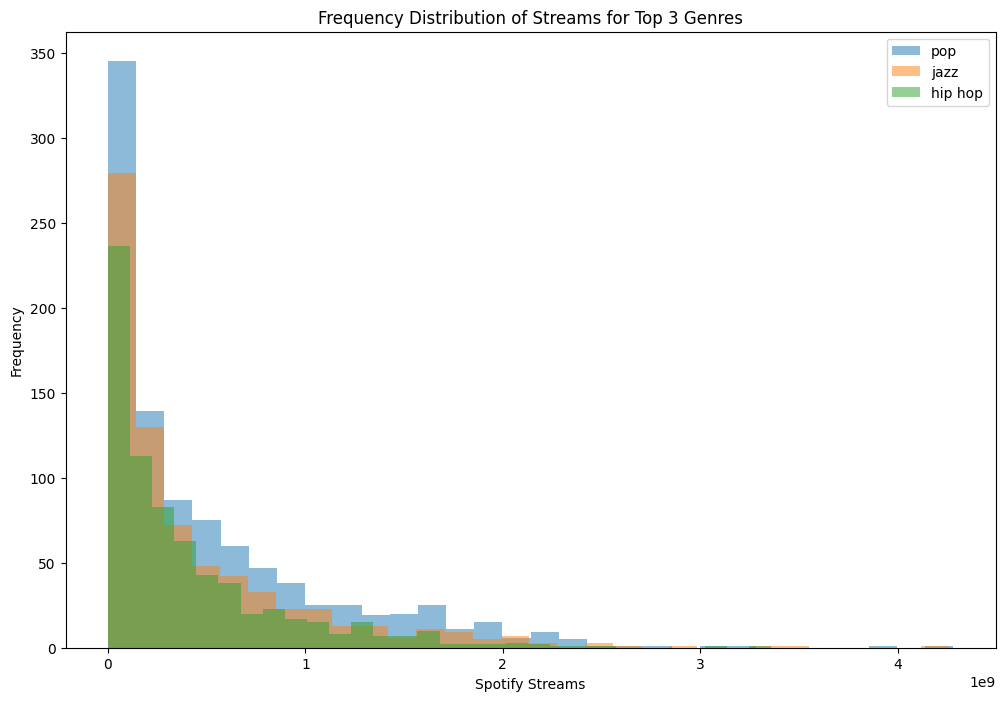

In [66]:
# Get top 3 genres
top_genres = data['Genres'].value_counts().head(3).index
# Filter data for top 3 genres
top_genres_data = data[data['Genres'].isin(top_genres)]
# Plot histograms
plt.figure(figsize=(12, 8))
for genre in top_genres:
    subset = top_genres_data[top_genres_data['Genres'] == genre]
    plt.hist(subset['Spotify Streams'], bins=30, alpha=0.5, label=genre)   
plt.xlabel('Spotify Streams')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Streams for Top 3 Genres')
plt.legend()
plt.show()


Find Maximum Streams by Release_Month where Genre is 'dance pop' and Artist is 'Taylor Swift'

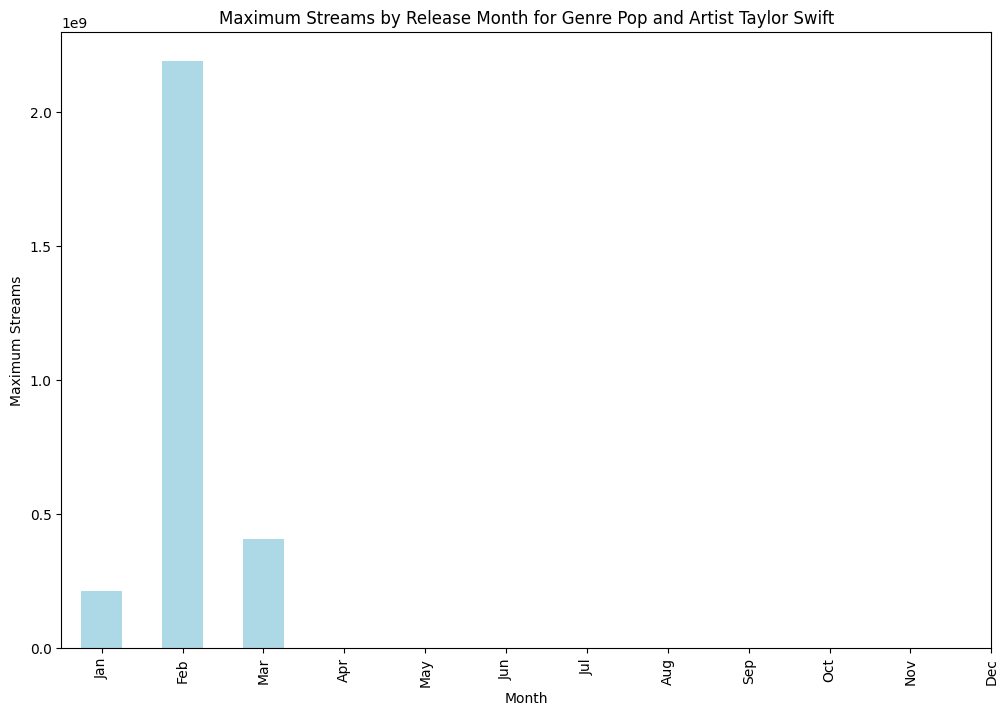

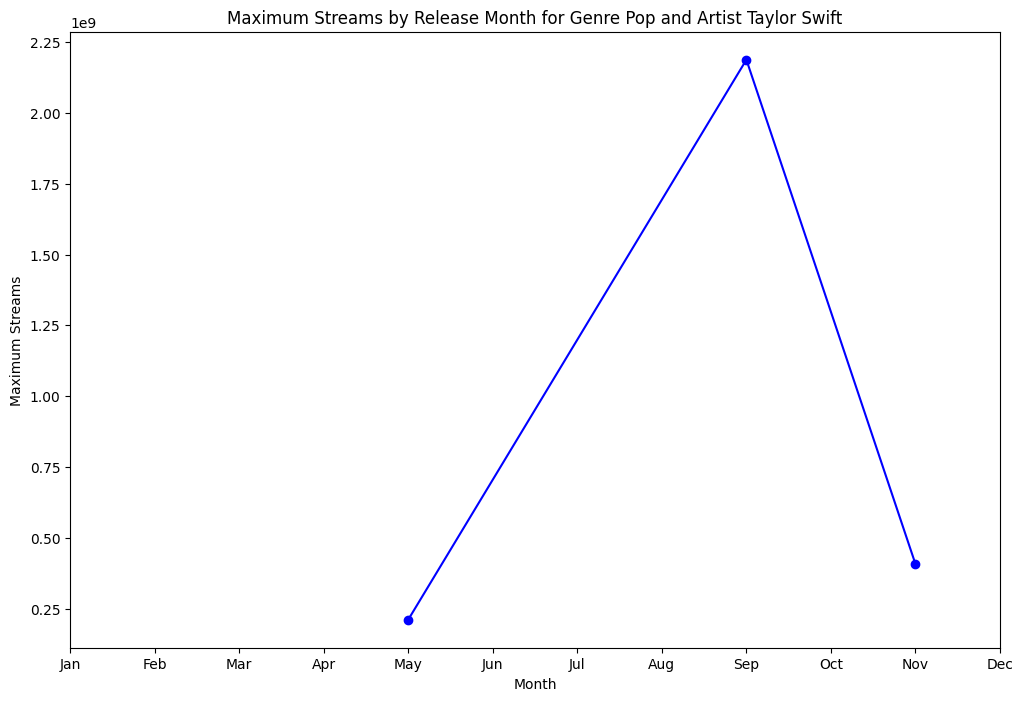

In [59]:
# Filter data for genre 'Pop' and artist 'Taylor Swift'
pop_taylor_data = data[(data['Genres'] == 'pop') & (data['Artist'] == 'Taylor Swift')]

# Group by release month and find max streams
pop_taylor_max_streams = pop_taylor_data.groupby('Release_Month')['Spotify Streams'].max()

# Month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Bar chart with month names
plt.figure(figsize=(12, 8))
pop_taylor_max_streams.plot(kind='bar', color='lightblue')
plt.xlabel('Month')
plt.ylabel('Maximum Streams')
plt.title('Maximum Streams by Release Month for Genre Pop and Artist Taylor Swift')
plt.xticks(ticks=range(12), labels=month_names)
plt.show()

# Line chart with month names
plt.figure(figsize=(12, 8))
pop_taylor_max_streams.plot(kind='line', marker='o', color='blue')
plt.xlabel('Month')
plt.ylabel('Maximum Streams')
plt.title('Maximum Streams by Release Month for Genre Pop and Artist Taylor Swift')
plt.xticks(ticks=range(12), labels=month_names)
plt.show()



Distribution of Genres in the Dataset

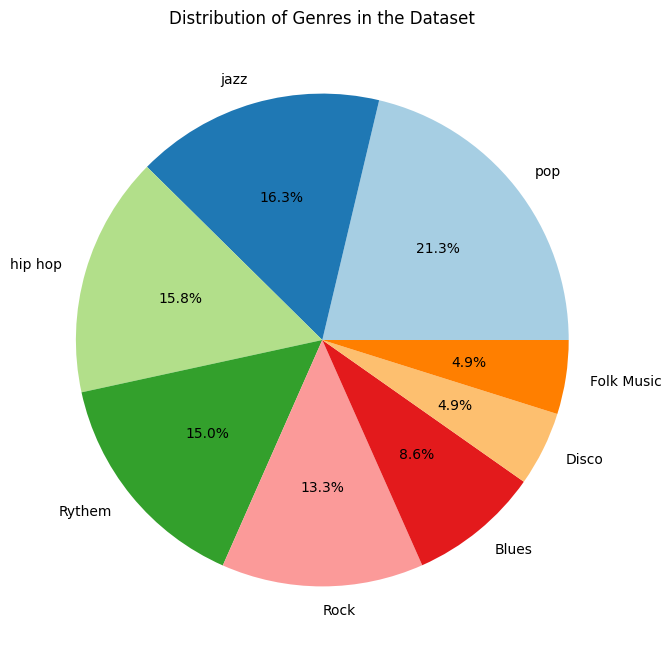

In [60]:
# Group by genre and count the number of songs in each genre
genre_counts = data['Genres'].value_counts()

# Pie chart
plt.figure(figsize=(12, 8))
genre_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired(range(len(genre_counts))))
plt.ylabel('')
plt.title('Distribution of Genres in the Dataset')
plt.show()



Total Streams by Genre for a Specific Year (e.g., 2024)

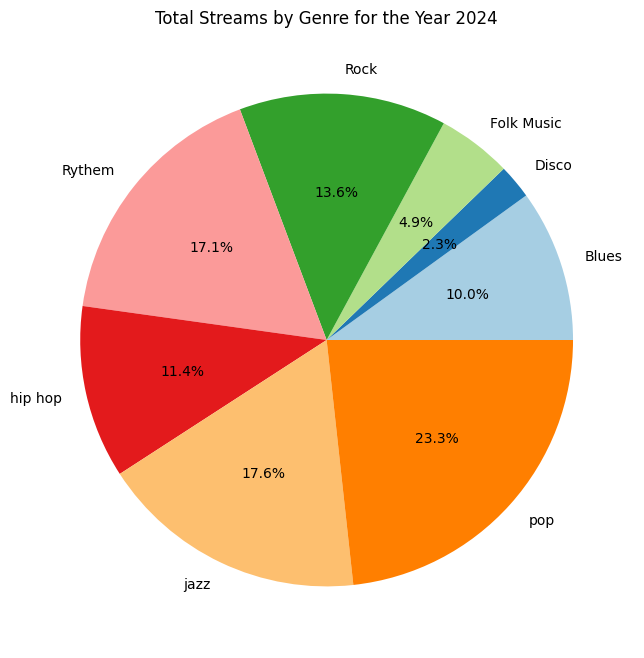

In [61]:
# Filter data for the year 2024
year_2024_data = data[data['Release_Year'] == 2024]

# Group by genre and sum the streams for each genre
year_2024_genre_streams_sum = year_2024_data.groupby('Genres')['Spotify Streams'].sum()

# Pie chart
plt.figure(figsize=(12, 8))
year_2024_genre_streams_sum.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired(range(len(year_2024_genre_streams_sum))))
plt.ylabel('')
plt.title('Total Streams by Genre for the Year 2024')
plt.show()


Statistically infer the Genre, Artist, and Track chosen to further expand/invest into the music business based on Spotify_Streams, YouTube_Views, and Track Score.



Top Genres based on Total Revenue:
         Spotify Streams                                      YouTube Views  \
Genres                                                                        
pop         4.924798e+11  11,63,47,0403,27,35,24414,16,46,81824,09,70,67...   
jazz        3.187804e+11  12,25,99,1163,22,29,0631,60,38,05310,75,50,212...   
Rock        2.767436e+11  8,42,74,75410,46,73,83680,08,99,31516,32,27,56...   
hip hop     2.865406e+11  1,09,61,00,89911,82,08,0964,80,93,1115,24,80,0...   
Rythem      2.501448e+11  7,73,73,9574,00,22,5243,57,24,3566,21,23,0982,...   

         Track Score  
Genres                
pop          48729.7  
jazz         30650.2  
Rock         27581.4  
hip hop      23850.3  
Rythem       22831.4  

Top Artists based on Total Revenue:
               Spotify Streams  \
Artist                           
Drake             3.496216e+10   
Bad Bunny         3.705483e+10   
Taylor Swift      3.447077e+10   
Billie Eilish     1.681183e+10   
KAROL G  

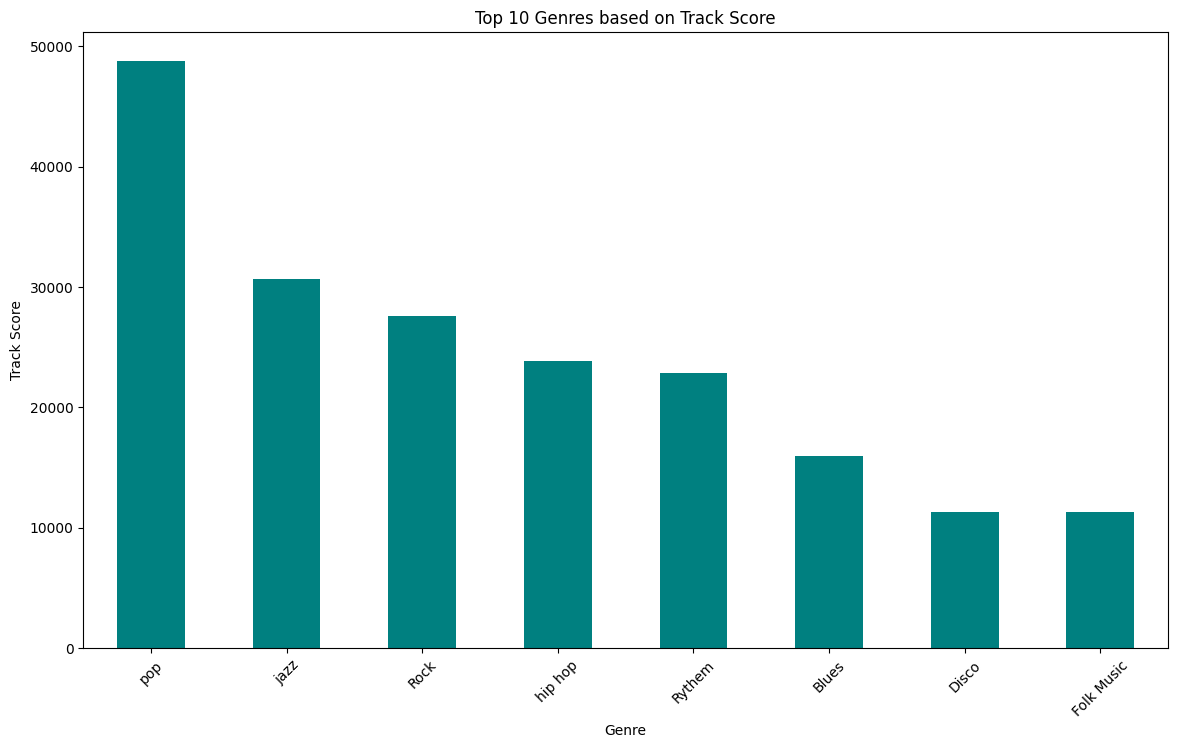

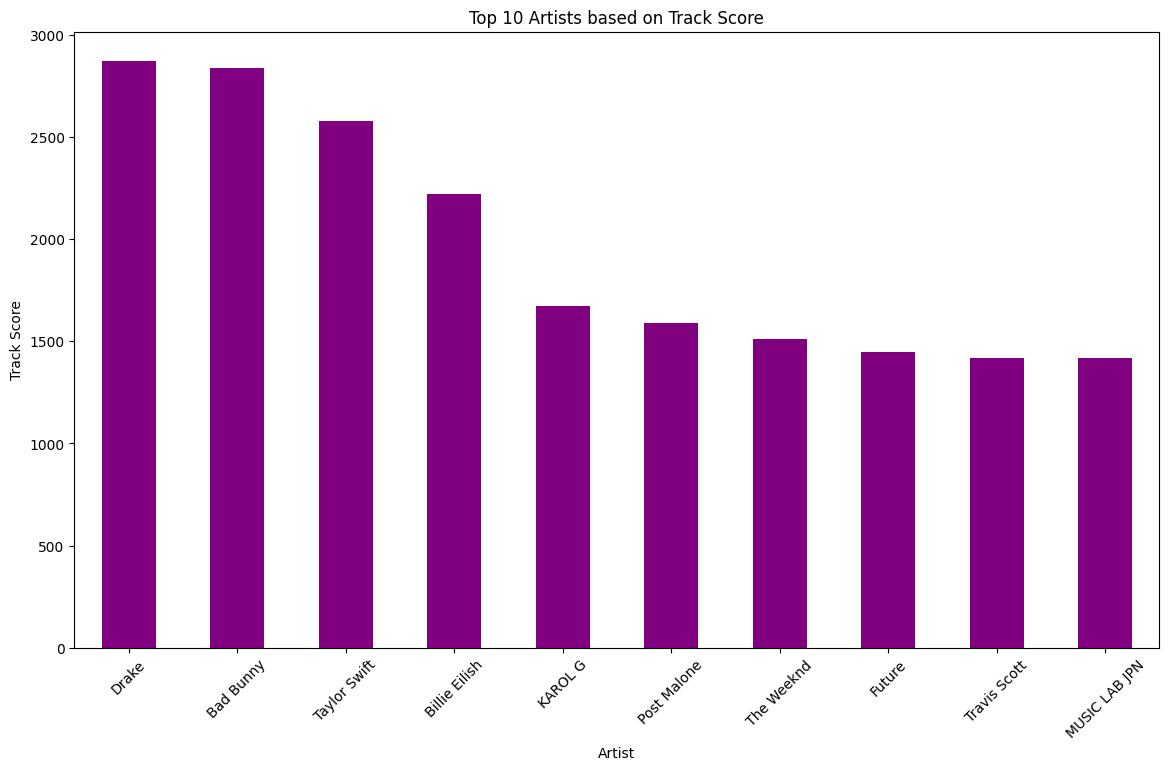

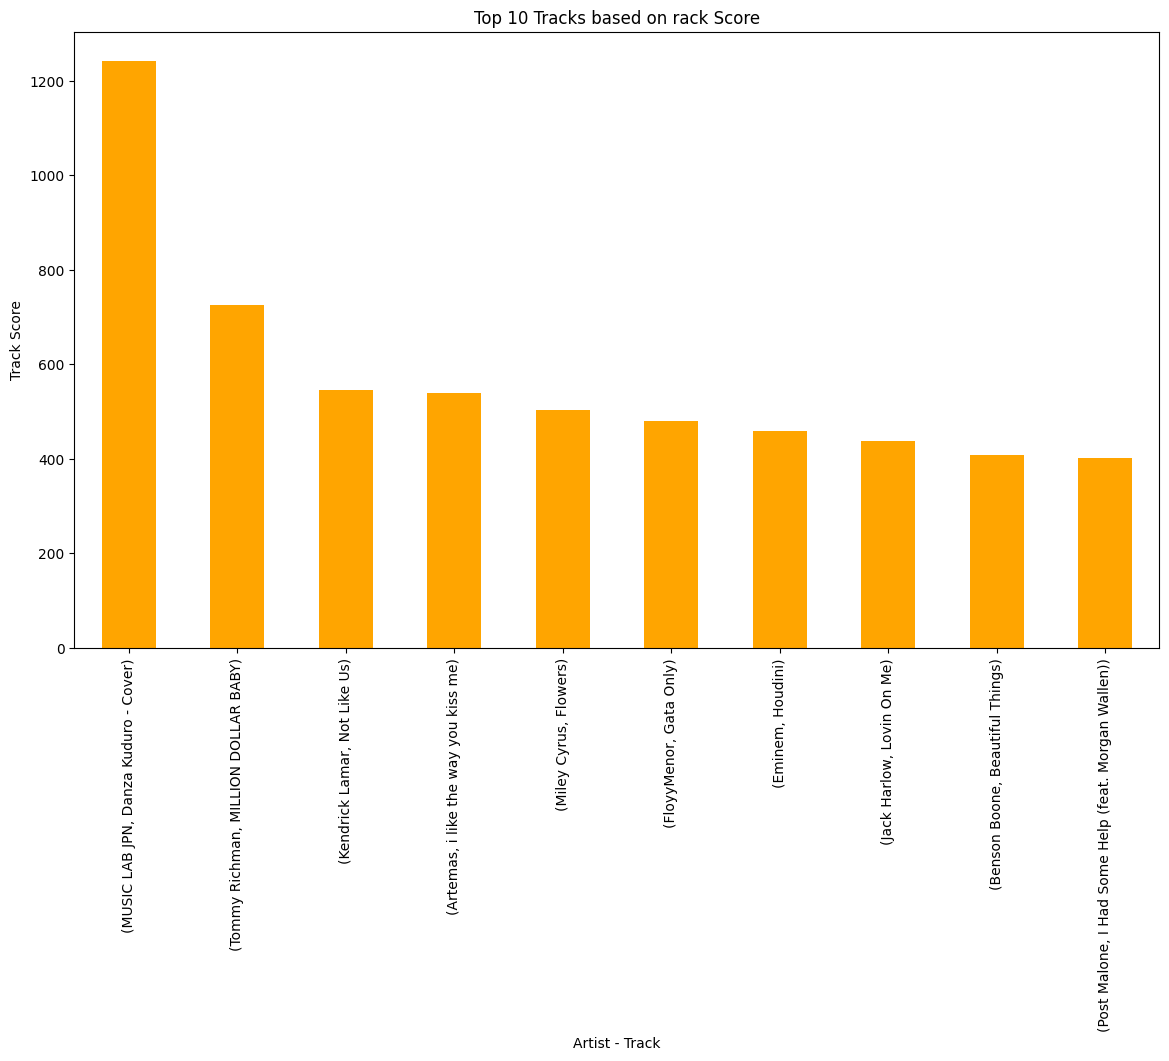

In [62]:
# Aggregate data to calculate total streams, views, and revenue by Genre, Artist, and Track
genre_summary = data.groupby('Genres').agg({
    'Spotify Streams': 'sum',
    'YouTube Views': 'sum',
    'Track Score': 'sum'
}).sort_values(by='Track Score', ascending=False)

artist_summary = data.groupby('Artist').agg({
    'Spotify Streams': 'sum',
    'YouTube Views': 'sum',
    'Track Score': 'sum'
}).sort_values(by='Track Score', ascending=False)

track_summary = data.groupby(['Artist', 'Track']).agg({
    'Spotify Streams': 'sum',
    'YouTube Views': 'sum',
    'Track Score': 'sum'
}).sort_values(by='Track Score', ascending=False)

# Print the top Genres, Artists, and Tracks based on Total Revenue
print("Top Genres based on Total Revenue:")
print(genre_summary.head())

print("\nTop Artists based on Total Revenue:")
print(artist_summary.head())

print("\nTop Tracks based on Total Revenue:")
print(track_summary.head())

# Visualize the top 10 Genres based on Total Revenue
plt.figure(figsize=(14, 8))
genre_summary['Track Score'].head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Genres based on Track Score')
plt.xlabel('Genre')
plt.ylabel('Track Score')
plt.xticks(rotation=45)
plt.show()

# Visualize the top 10 Artists based on Total Revenue
plt.figure(figsize=(14, 8))
artist_summary['Track Score'].head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Artists based on Track Score')
plt.xlabel('Artist')
plt.ylabel('Track Score')
plt.xticks(rotation=45)
plt.show()

# Visualize the top 10 Tracks based on Total Revenue
plt.figure(figsize=(14, 8))
track_summary['Track Score'].head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Tracks based on rack Score')
plt.xlabel('Artist - Track')
plt.ylabel('Track Score')
plt.xticks(rotation=90)
plt.show()
